In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
from google.colab import drive
from IPython.display import display
drive.mount('/content/drive')
path1 = '/content/drive/MyDrive/Dataset/seleksi-dsa-compfest-17/train.csv'
path2 = '/content/drive/MyDrive/Dataset/seleksi-dsa-compfest-17/test.csv'
train = pd.read_csv(path1)
display(train)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,date,cluster_id,electricity_consumption,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,sunshine_duration,daylight_duration,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration
0,cluster_1_2014-01-01,2014-01-01,cluster_1,358.032,10.8,4.2,5.5,0.4,53.003333,29787.533333,40.6,79.2,186.000000,1.176667,0.483333
1,cluster_2_2014-01-01,2014-01-01,cluster_2,548.247,12.2,4.3,8.6,-0.4,8195.656667,30650.350000,36.0,81.7,170.591118,3.383333,0.736667
2,cluster_3_2014-01-01,2014-01-01,cluster_3,758.303,12.9,-0.8,10.1,-4.9,16305.260000,31547.686667,20.9,44.3,159.467752,3.880000,0.716667
3,cluster_4_2014-01-01,2014-01-01,cluster_4,1072.077,10.8,4.7,6.7,0.6,9224.803333,30769.220000,34.7,82.8,184.339753,3.153333,0.676667
4,cluster_1_2014-01-02,2014-01-02,cluster_1,386.908,10.7,7.0,6.6,3.3,22372.000000,29850.226667,34.3,75.2,210.333465,3.640000,0.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11683,cluster_4_2021-12-30,2021-12-30,cluster_4,994.158,14.9,7.7,15.6,6.2,16136.066667,30666.253333,22.8,42.8,263.384394,3.563333,0.590000
11684,cluster_1_2021-12-31,2021-12-31,cluster_1,354.565,14.7,7.7,13.4,5.2,19148.153333,29727.200000,20.7,37.4,201.332279,3.510000,0.513333
11685,cluster_2_2021-12-31,2021-12-31,cluster_2,507.510,16.2,7.0,16.3,4.5,20570.920000,30594.280000,23.3,40.7,186.250597,5.006667,0.733333
11686,cluster_3_2021-12-31,2021-12-31,cluster_3,705.999,15.9,5.9,15.9,3.2,26860.350000,31496.173333,15.1,27.7,196.223902,5.783333,0.720000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11688 entries, 0 to 11687
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11688 non-null  object 
 1   date                         11688 non-null  object 
 2   cluster_id                   11688 non-null  object 
 3   electricity_consumption      11688 non-null  float64
 4   temperature_2m_max           11688 non-null  float64
 5   temperature_2m_min           11688 non-null  float64
 6   apparent_temperature_max     11688 non-null  float64
 7   apparent_temperature_min     11688 non-null  float64
 8   sunshine_duration            11688 non-null  float64
 9   daylight_duration            11688 non-null  float64
 10  wind_speed_10m_max           11688 non-null  float64
 11  wind_gusts_10m_max           11688 non-null  float64
 12  wind_direction_10m_dominant  11688 non-null  float64
 13  shortwave_radiat

# **Exploratory Data Analitycs(EDA)**

**Ubah Kolom date Jadi Tipe Datetime + Buat Kolom Tambahan**

In [ ]:
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['dayofweek'] = train['date'].dt.dayofweek
train['dayofyear'] = train['date'].dt.dayofyear

**Distribusi Konsumsi Listrik**

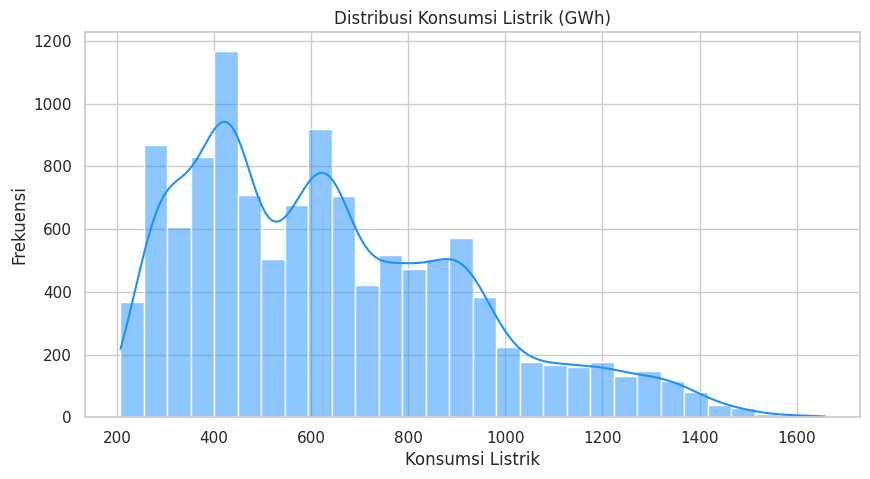

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(train['electricity_consumption'], kde=True, bins=30, color='dodgerblue')
plt.title('Distribusi Konsumsi Listrik (GWh)')
plt.xlabel('Konsumsi Listrik')
plt.ylabel('Frekuensi')
plt.show()

**konsumsi rata rata perbulan**

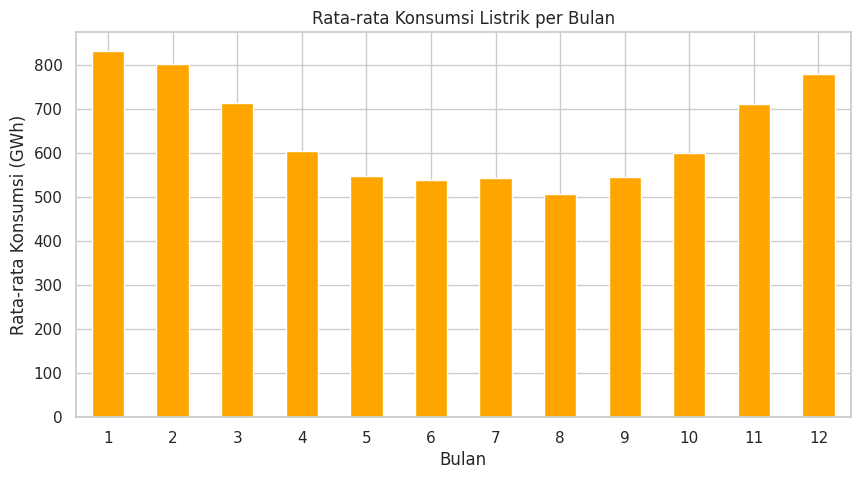

In [ ]:
monthly_avg = train.groupby('month')['electricity_consumption'].mean()

plt.figure(figsize=(10,5))
monthly_avg.plot(kind='bar', color='orange')
plt.title('Rata-rata Konsumsi Listrik per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Konsumsi (GWh)')
plt.xticks(rotation=0)
plt.show()

**Rata rata konsumsi listrik perhari**

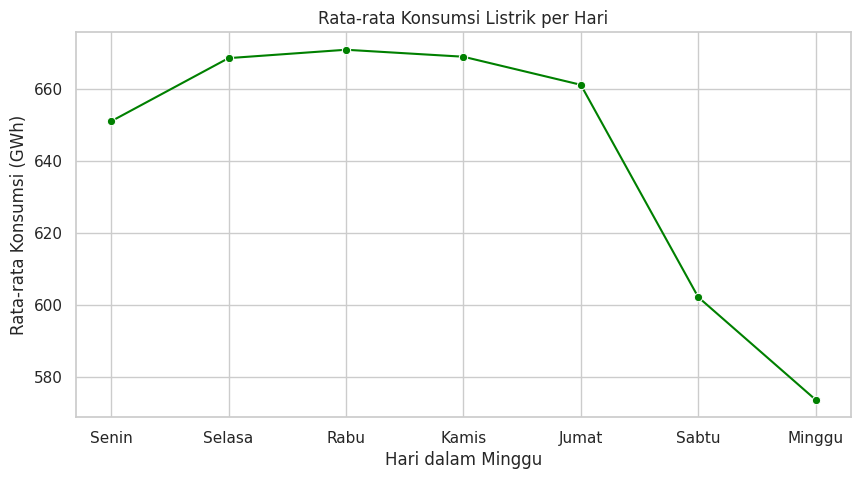

In [ ]:
days = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
weekly_avg = train.groupby('dayofweek')['electricity_consumption'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=days, y=weekly_avg, marker='o', color='green')
plt.title('Rata-rata Konsumsi Listrik per Hari')
plt.ylabel('Rata-rata Konsumsi (GWh)')
plt.xlabel('Hari dalam Minggu')
plt.show()

**Suhu maksimum vs Konsumsi listrik**

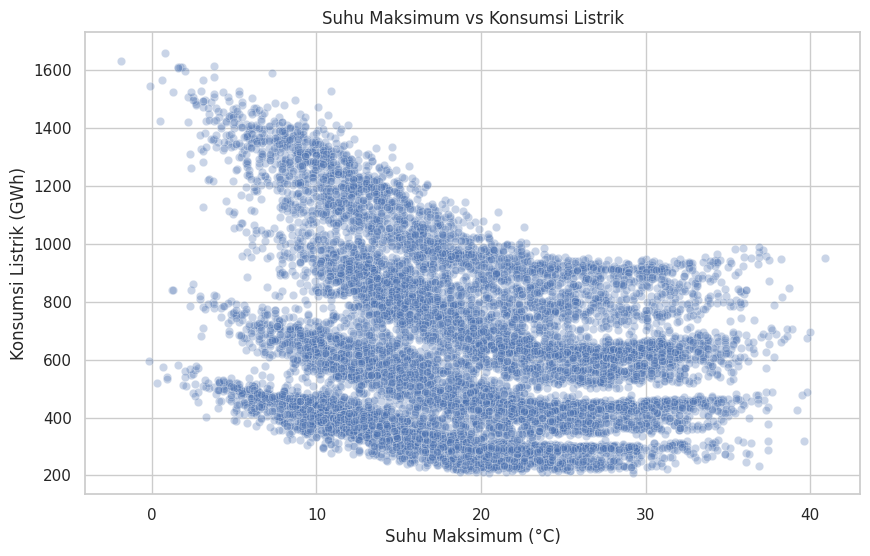

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='temperature_2m_max', y='electricity_consumption', data=train, alpha=0.3)
plt.title('Suhu Maksimum vs Konsumsi Listrik')
plt.xlabel('Suhu Maksimum (°C)')
plt.ylabel('Konsumsi Listrik (GWh)')
plt.show()

**Korelasi fitur numerik**

In [ ]:
correlation = train.corr(numeric_only=True)['electricity_consumption'].drop('electricity_consumption')
correlation = correlation.sort_values(ascending=False)  # Urut dari paling positif ke paling negatif

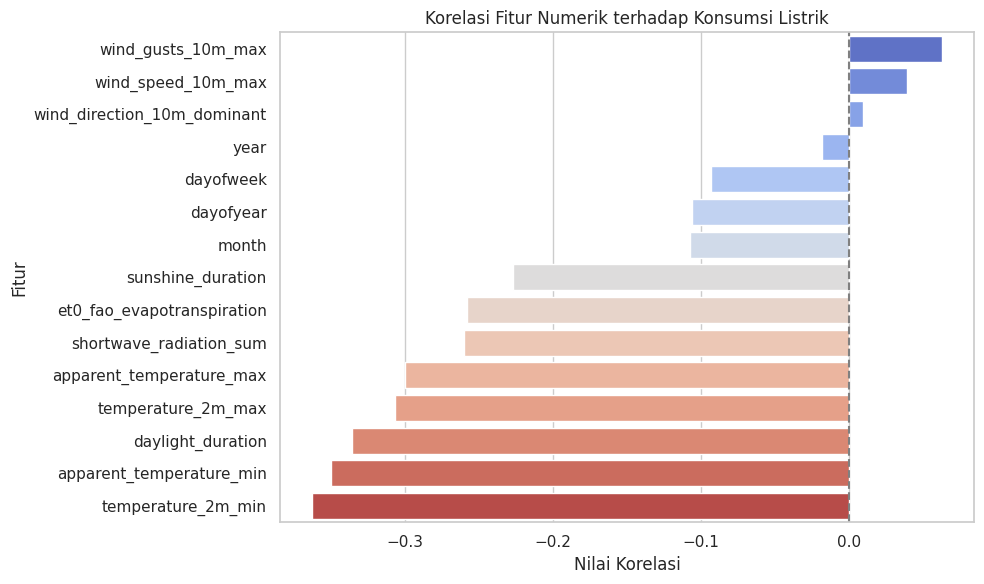

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlation.values, y=correlation.index, palette='coolwarm')
plt.title('Korelasi Fitur Numerik terhadap Konsumsi Listrik')
plt.xlabel('Nilai Korelasi')
plt.ylabel('Fitur')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

**Konsumsi listrik per cluster**

<Axes: xlabel='cluster_id', ylabel='electricity_consumption'>

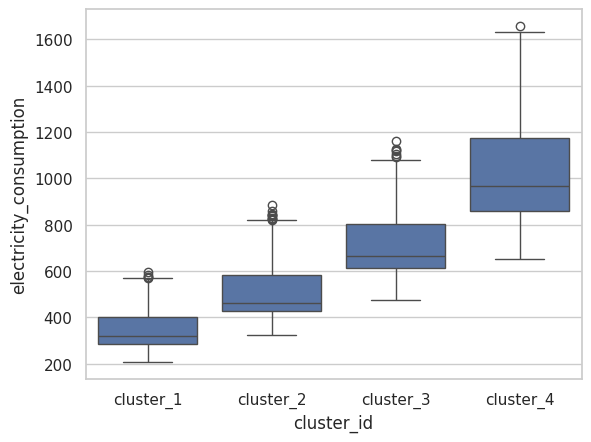

In [ ]:
sns.boxplot(x='cluster_id', y='electricity_consumption', data=train)

**cek outlier pada target**

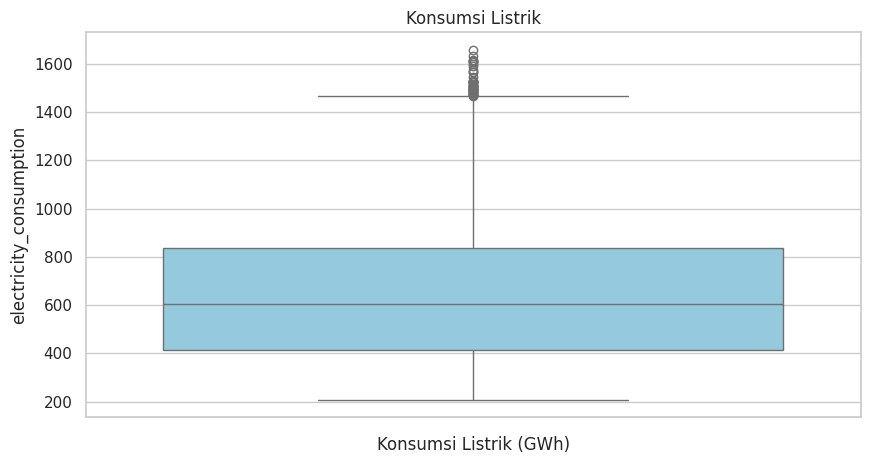

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=train['electricity_consumption'], color='skyblue')
plt.title('Konsumsi Listrik')
plt.xlabel('Konsumsi Listrik (GWh)')
plt.show()


**Cek outlier pada feature**

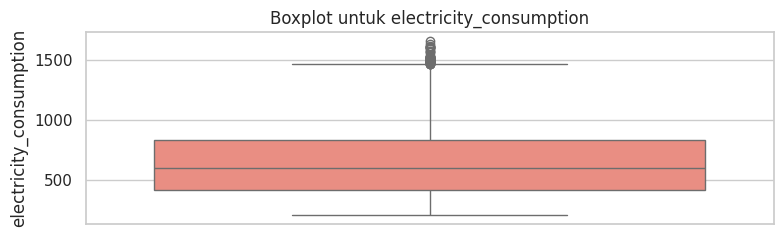

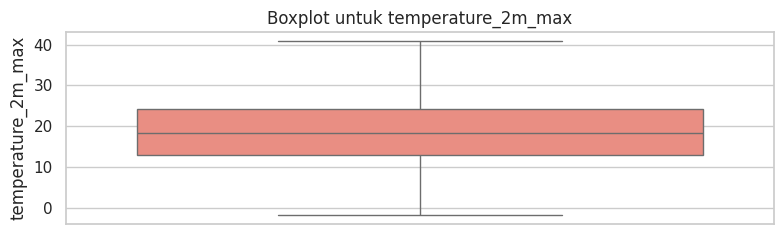

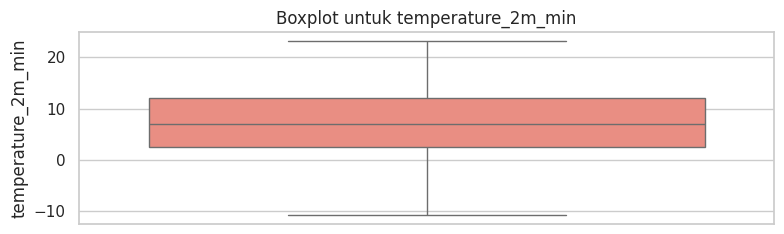

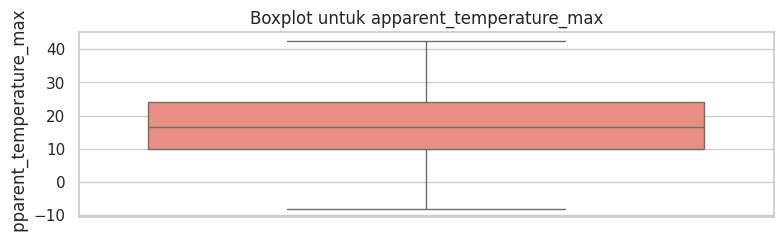

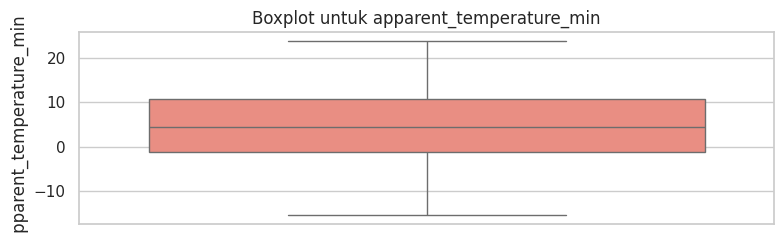

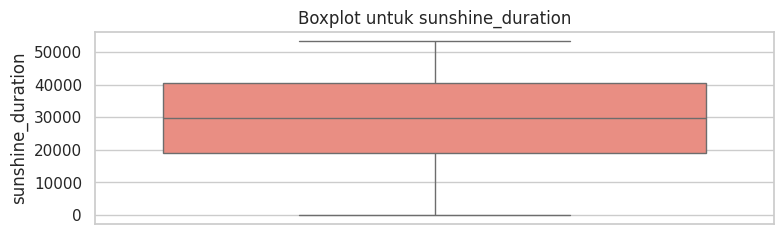

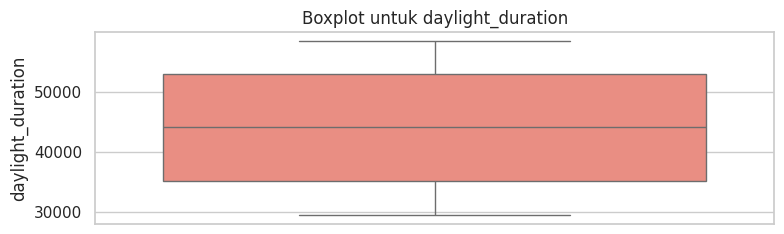

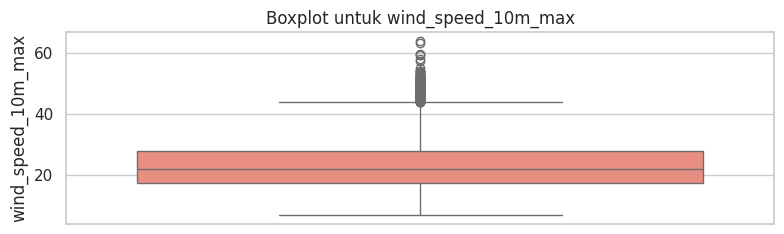

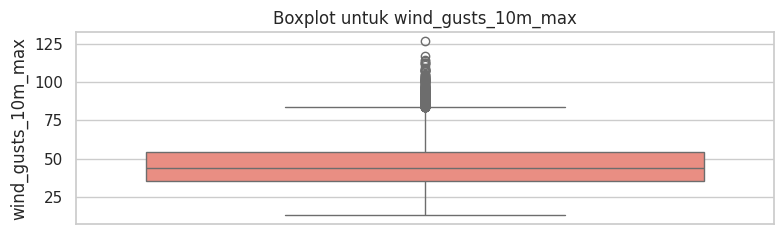

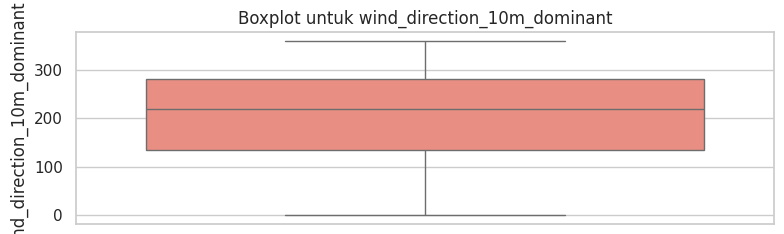

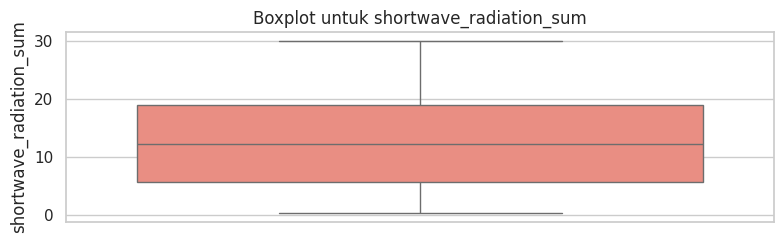

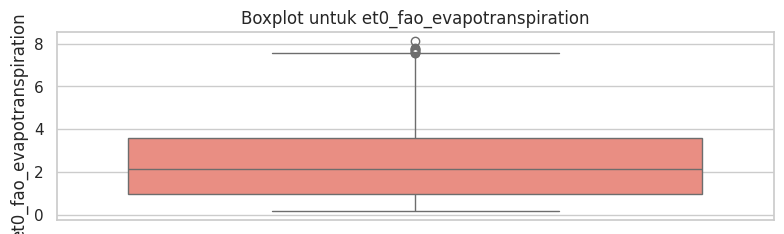

In [ ]:
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 2.5))
    sns.boxplot(data=train[col], color='salmon')
    plt.title(f'Boxplot untuk {col}')
    plt.tight_layout()
    plt.show()

# **Preprocessing**

**Hapus outlier untuk target**

In [ ]:
# Hitung batas bawah dan atas
Q1 = train['electricity_consumption'].quantile(0.25)
Q3 = train['electricity_consumption'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Buat dataframe baru tanpa outlier
df_cleaned = train[(train['electricity_consumption'] >= lower_bound) & (train['electricity_consumption'] <= upper_bound)]


print(f"Jumlah data sebelum: {len(train)}")
print(f"Jumlah data setelah: {len(df_cleaned)}")
print(f"Jumlah data yang dihapus: {len(train) - len(df_cleaned)}")

Jumlah data sebelum: 11688
Jumlah data setelah: 11642
Jumlah data yang dihapus: 46


In [ ]:
df = df_cleaned.copy()

**hapus outlier untuk fitur**

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

df_cleaned = df.copy()

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Hapus baris outlier dari kolom ini
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]

print(f"Jumlah data sebelum: {len(df)}")
print(f"Jumlah data setelah bersih dari outlier: {len(df_cleaned)}")
print(f"Total data yang dihapus: {len(df) - len(df_cleaned)}")

Jumlah data sebelum: 11642
Jumlah data setelah bersih dari outlier: 11341
Total data yang dihapus: 301


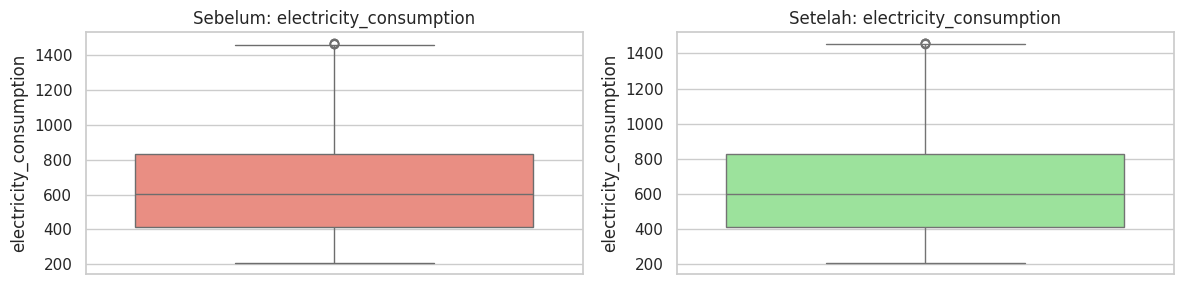

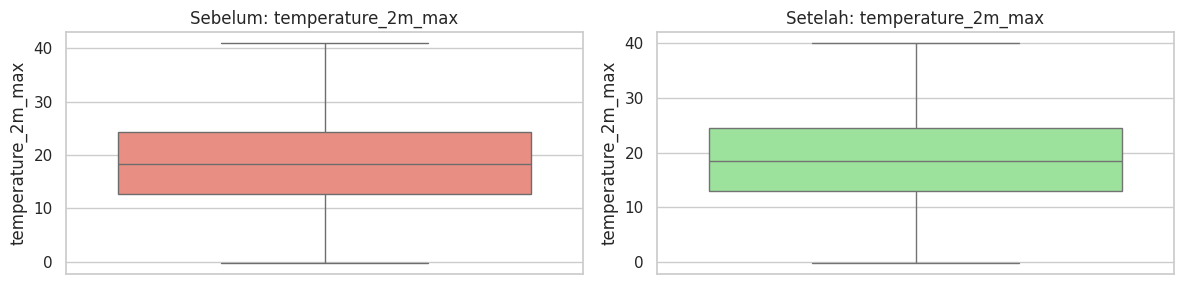

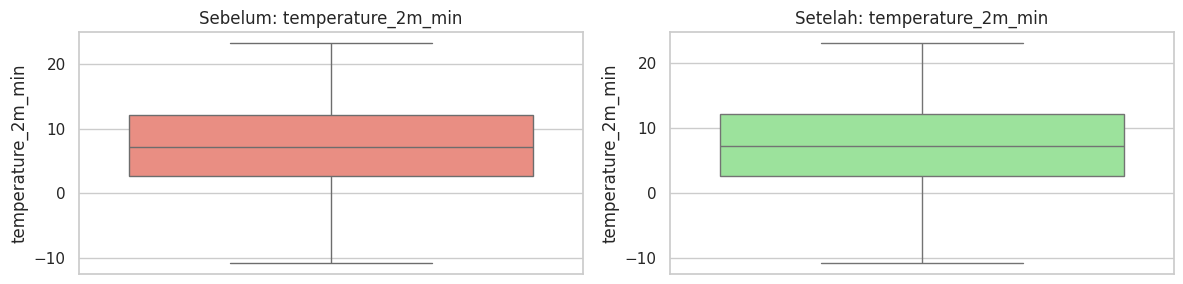

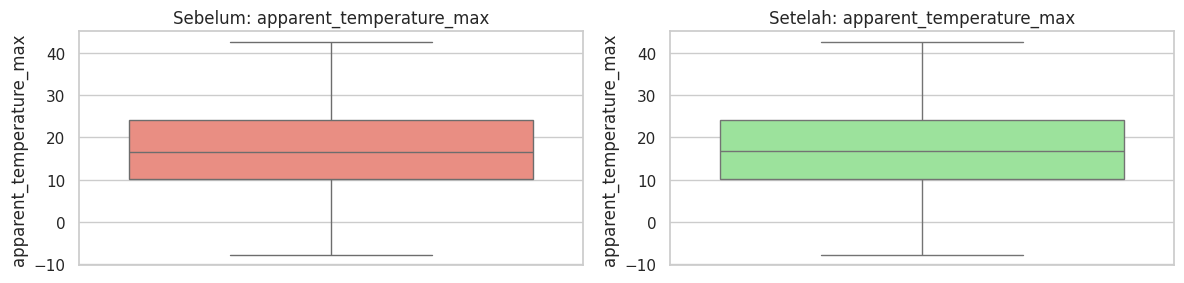

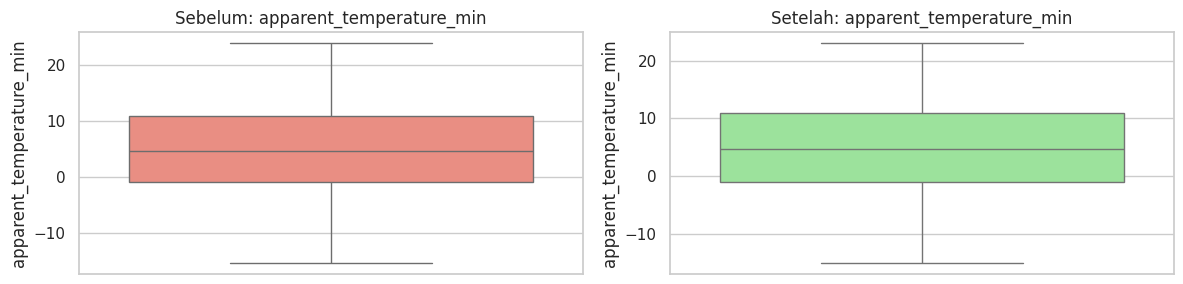

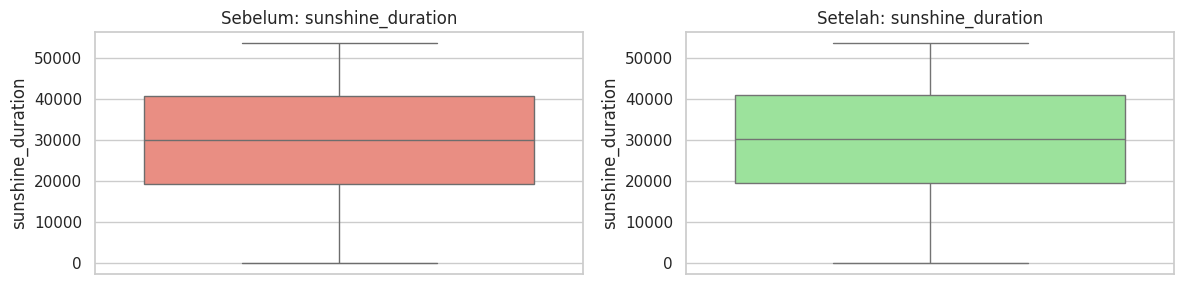

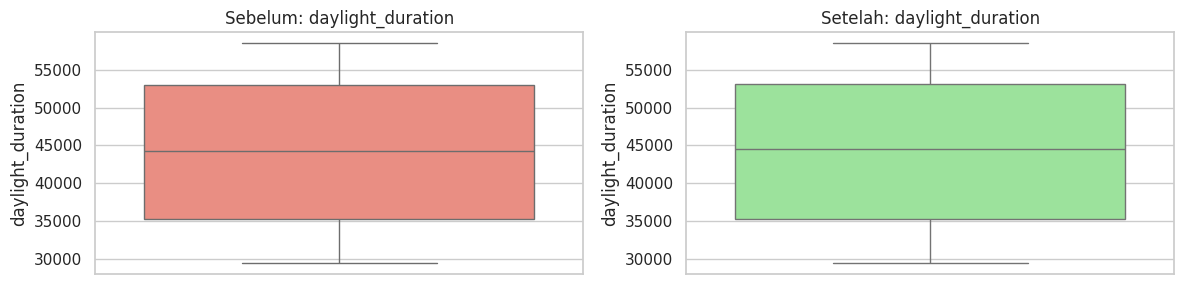

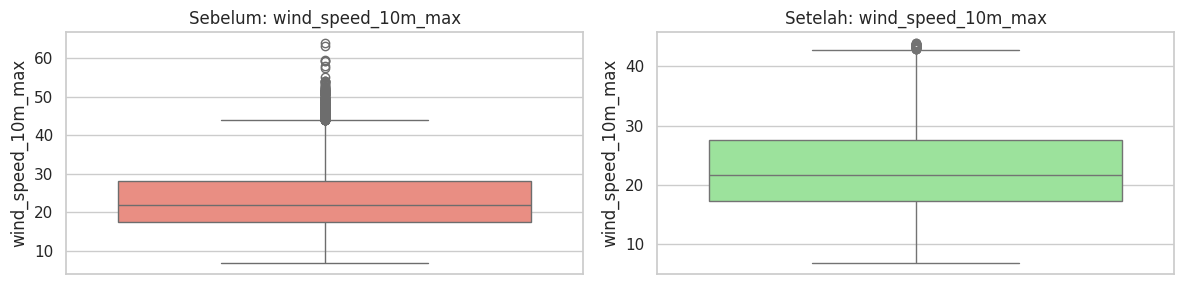

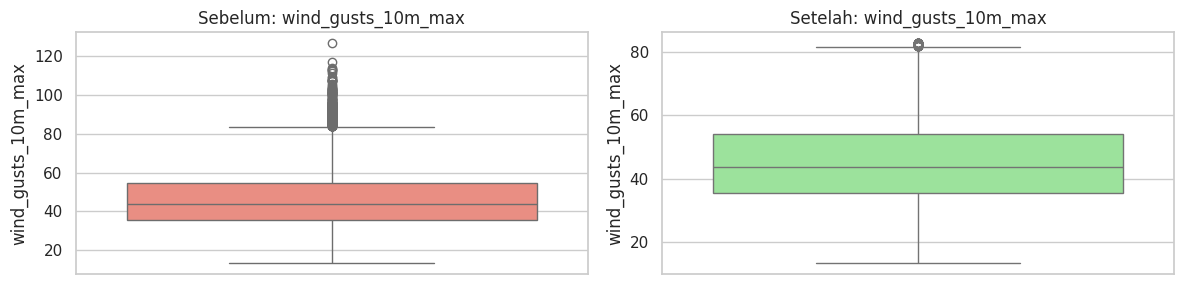

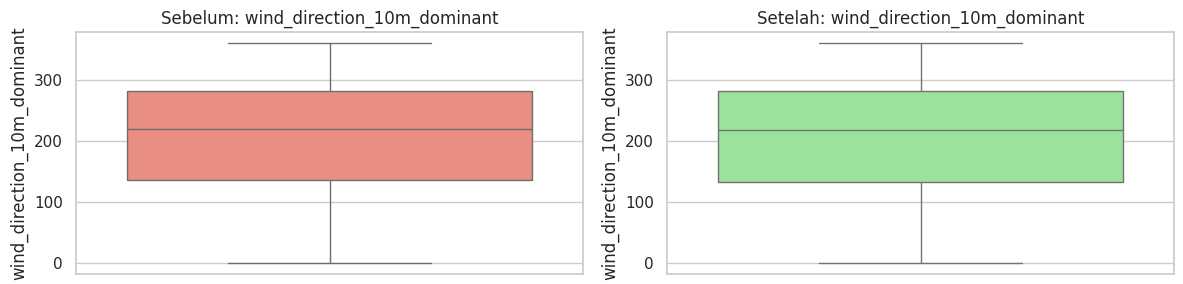

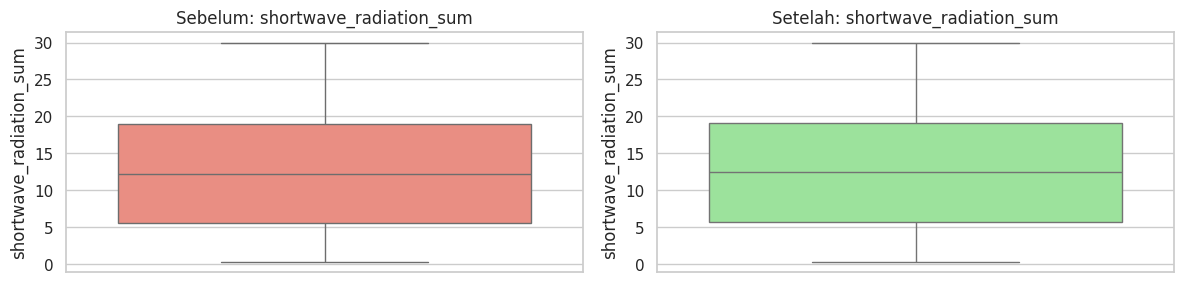

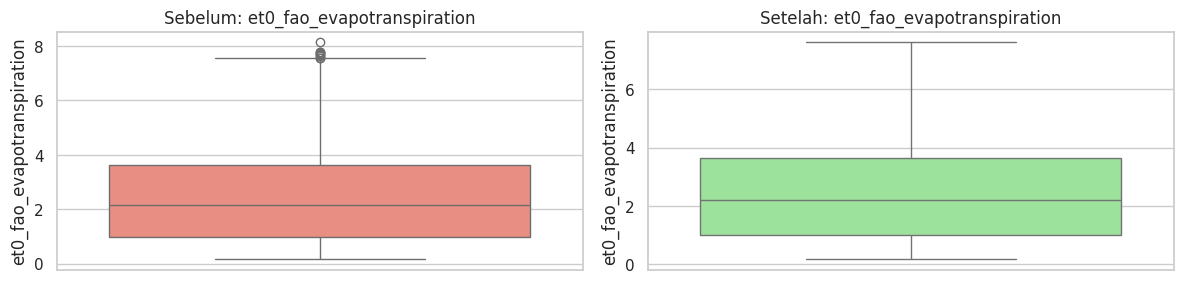

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))

    sns.boxplot(data=df[col], ax=axes[0], color='salmon')
    axes[0].set_title(f"Sebelum: {col}")

    sns.boxplot(data=df_cleaned[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f"Setelah: {col}")

    plt.tight_layout()
    plt.show()

**Feature engineering**

In [ ]:
df_cleaned['date'] = pd.to_datetime(df['date'])

# Fitur dari tanggal
df_cleaned['dayofweek'] = df_cleaned['date'].dt.dayofweek
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['dayofyear'] = df_cleaned['date'].dt.dayofyear
df_cleaned['day'] = df_cleaned['date'].dt.day

# Apakah hari libur?
df_cleaned['is_weekend'] = df_cleaned['dayofweek'].isin([5, 6]).astype(int)

In [ ]:
# Rata-rata suhu
df_cleaned['avg_temperature'] = (df_cleaned['temperature_2m_max'] + df_cleaned['temperature_2m_min']) / 2

# Heat Index kasar (semakin tinggi → potensi konsumsi AC tinggi)
df_cleaned['heat_index'] = df_cleaned['avg_temperature'] * df_cleaned['shortwave_radiation_sum']

In [ ]:
print(df_cleaned.columns.tolist())

['ID', 'date', 'cluster_id', 'electricity_consumption', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max', 'apparent_temperature_min', 'sunshine_duration', 'daylight_duration', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'year', 'month', 'dayofweek', 'dayofyear', 'day', 'is_weekend', 'avg_temperature', 'heat_index']


In [ ]:
df = df_cleaned.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['cluster_id_encoded'] = le.fit_transform(df['cluster_id'])

In [ ]:
print("Fitur final:")
print(df.columns.tolist())

Fitur final:
['ID', 'date', 'cluster_id', 'electricity_consumption', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max', 'apparent_temperature_min', 'sunshine_duration', 'daylight_duration', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'year', 'month', 'dayofweek', 'dayofyear', 'day', 'is_weekend', 'avg_temperature', 'heat_index', 'cluster_id_encoded']


In [ ]:
df.drop(columns=['ID'], inplace=True)

In [ ]:
df.drop(columns=['cluster_id'], inplace=True)

In [ ]:
df.drop(columns=['date'], inplace=True)

In [ ]:
df.drop(columns=['year','day'], inplace=True)

In [ ]:
print(df.columns.tolist())

['electricity_consumption', 'temperature_2m_max', 'temperature_2m_min', 'apparent_temperature_max', 'apparent_temperature_min', 'sunshine_duration', 'daylight_duration', 'wind_speed_10m_max', 'wind_gusts_10m_max', 'wind_direction_10m_dominant', 'shortwave_radiation_sum', 'et0_fao_evapotranspiration', 'month', 'dayofweek', 'dayofyear', 'is_weekend', 'avg_temperature', 'heat_index', 'cluster_id_encoded']


## **Modelling**

In [ ]:
from sklearn.model_selection import train_test_split

# Target
y = df['electricity_consumption']

# Fitur
X = df.drop(columns=['electricity_consumption'])

# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error
import numpy as np

# Model dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
}

# Simpan skor
rmse_scores = {}

# Train & Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores[name] = rmse
    print(f"{name}  RMSE: {rmse:.4f}")

Linear Regression  RMSE: 66.0123
Random Forest  RMSE: 31.9767
XGBoost  RMSE: 29.9052
Gradient Boosting  RMSE: 33.6366
KNN  RMSE: 282.3638


# **Tuning (Optuna)**

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 15.5 MB/s eta 0:00:00


In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
    return -score.mean()  # Minimalkan RMSE

# Mulai optimasi
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Hasil terbaik
print(" Best trial score (RMSE):", study.best_value)
print(" Best params:", study.best_params)

[I 2025-06-18 16:53:28,413] A new study created in memory with name: no-name-cd062dda-7485-4d30-bf95-e24b55dcd78b


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-06-18 16:54:05,058] Trial 0 finished with value: 31.25044110031917 and parameters: {'n_estimators': 316, 'max_depth': 10, 'learning_rate': 0.019976509754034522, 'subsample': 0.6425120230922629, 'colsample_bytree': 0.8336068207608582, 'gamma': 2.428287287032387, 'reg_alpha': 1.0349940188381956, 'reg_lambda': 0.845022080589492}. Best is trial 0 with value: 31.25044110031917.
[I 2025-06-18 16:54:33,970] Trial 1 finished with value: 31.832487153765374 and parameters: {'n_estimators': 490, 'max_depth': 14, 'learning_rate': 0.08406759788013338, 'subsample': 0.973474794118302, 'colsample_bytree': 0.9280693331005894, 'gamma': 2.669332535098117, 'reg_alpha': 2.491362560276083, 'reg_lambda': 3.320069613426193}. Best is trial 0 with value: 31.25044110031917.
[I 2025-06-18 16:54:44,783] Trial 2 finished with value: 64.22851160128383 and parameters: {'n_estimators': 227, 'max_depth': 9, 'learning_rate': 0.010657632360560691, 'subsample': 0.6610616690781131, 'colsample_bytree': 0.71317577684

In [ ]:
from xgboost import XGBRegressor

# Model dengan parameter spesifik
final_model = XGBRegressor(
    n_estimators=498,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.6,
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# Latih model
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=498, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

# **Evaluasi**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = final_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" RMSE : {rmse:.4f}")
print(f" MAE  : {mae:.4f}")
print(f" R²   : {r2:.4f}")

 RMSE : 28.3902
 MAE  : 19.8276
 R²   : 0.9903


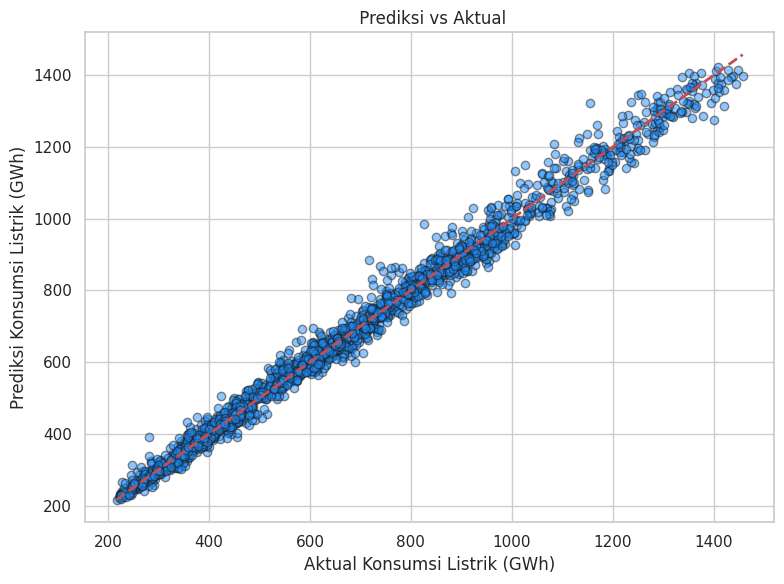

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='dodgerblue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Garis sempurna
plt.xlabel("Aktual Konsumsi Listrik (GWh)")
plt.ylabel("Prediksi Konsumsi Listrik (GWh)")
plt.title(" Prediksi vs Aktual")
plt.grid(True)
plt.tight_layout()
plt.show()

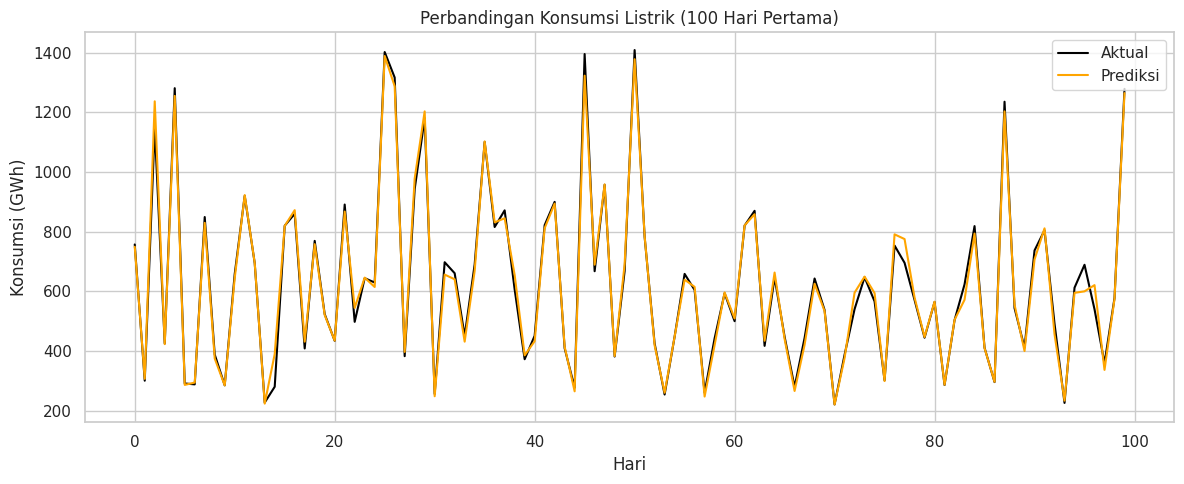

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(range(100), y_test[:100], label='Aktual', color='black')
plt.plot(range(100), y_pred[:100], label='Prediksi', color='orange')
plt.title("Perbandingan Konsumsi Listrik (100 Hari Pertama)")
plt.xlabel("Hari")
plt.ylabel("Konsumsi (GWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

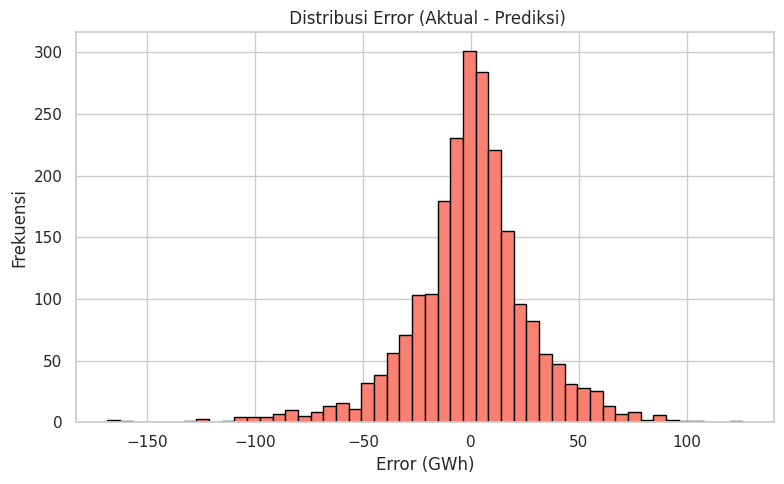

In [ ]:
errors = y_test - y_pred

plt.figure(figsize=(8,5))
plt.hist(errors, bins=50, color='salmon', edgecolor='black')
plt.title(" Distribusi Error (Aktual - Prediksi)")
plt.xlabel("Error (GWh)")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Prediksi**

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/Dataset/seleksi-dsa-compfest-17/test.csv")
test_ids = test_df['ID']

In [ ]:
X_train.columns.tolist()

['temperature_2m_max',
 'temperature_2m_min',
 'apparent_temperature_max',
 'apparent_temperature_min',
 'sunshine_duration',
 'daylight_duration',
 'wind_speed_10m_max',
 'wind_gusts_10m_max',
 'wind_direction_10m_dominant',
 'shortwave_radiation_sum',
 'et0_fao_evapotranspiration',
 'month',
 'dayofweek',
 'dayofyear',
 'is_weekend',
 'avg_temperature',
 'heat_index',
 'cluster_id_encoded']

In [ ]:
test_df['date'] = pd.to_datetime(test_df['date'])

# Fitur dari tanggal
test_df['dayofweek'] = test_df['date'].dt.dayofweek
test_df['month'] = test_df['date'].dt.month
test_df['dayofyear'] = test_df['date'].dt.dayofyear
test_df['day'] = test_df['date'].dt.day

# Apakah hari libur?
test_df['is_weekend'] = test_df['dayofweek'].isin([5, 6]).astype(int)


In [ ]:
# Rata-rata suhu
test_df['avg_temperature'] = (test_df['temperature_2m_max'] + test_df['temperature_2m_min']) / 2

# Heat Index kasar (semakin tinggi → potensi konsumsi AC tinggi)
test_df['heat_index'] = test_df['avg_temperature'] * test_df['shortwave_radiation_sum']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test_df['cluster_id_encoded'] = le.fit_transform(test_df['cluster_id'])

In [ ]:
test_df.drop(columns=['ID', 'date', 'cluster_id', 'day'], inplace=True)

In [ ]:
test_data = test_df[X_train.columns]

In [ ]:
y_pred = final_model.predict(test_data)

In [ ]:
import os
# Define the directory path
output_dir = "/content/drive/MyDrive/Colab/Notebooks"

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created directory: {output_dir}")

# Define the full file path
output_path = os.path.join(output_dir, "submission_final.csv")


submission = pd.DataFrame({
    'ID': test_ids,
    'electricity_consumption': y_pred
})

# Now save the submission file
submission.to_csv(output_path, index=False)
print(f"File {output_path} berhasil dibuat!")

Created directory: /content/drive/MyDrive/Colab/Notebooks
File /content/drive/MyDrive/Colab/Notebooks/submission_final.csv berhasil dibuat!


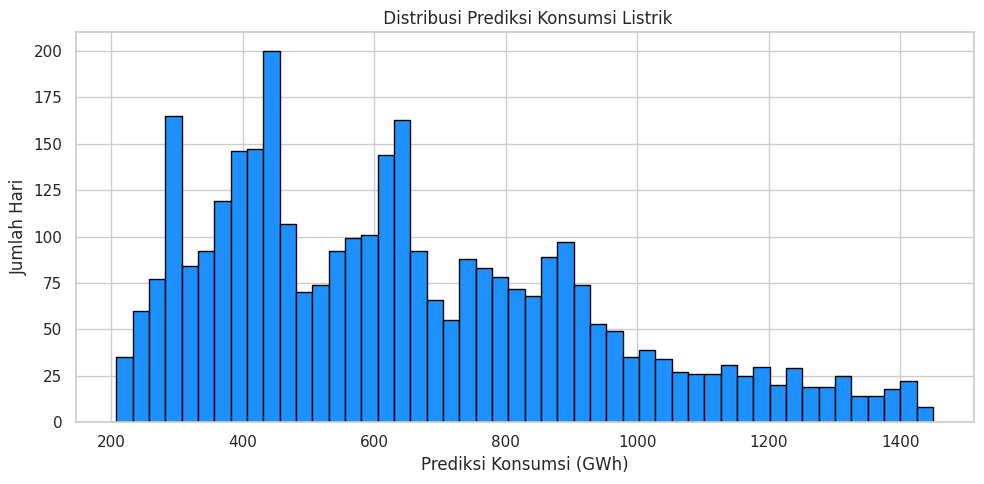

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(y_pred, bins=50, color='dodgerblue', edgecolor='black')
plt.title(" Distribusi Prediksi Konsumsi Listrik")
plt.xlabel("Prediksi Konsumsi (GWh)")
plt.ylabel("Jumlah Hari")
plt.grid(True)
plt.tight_layout()
plt.show()

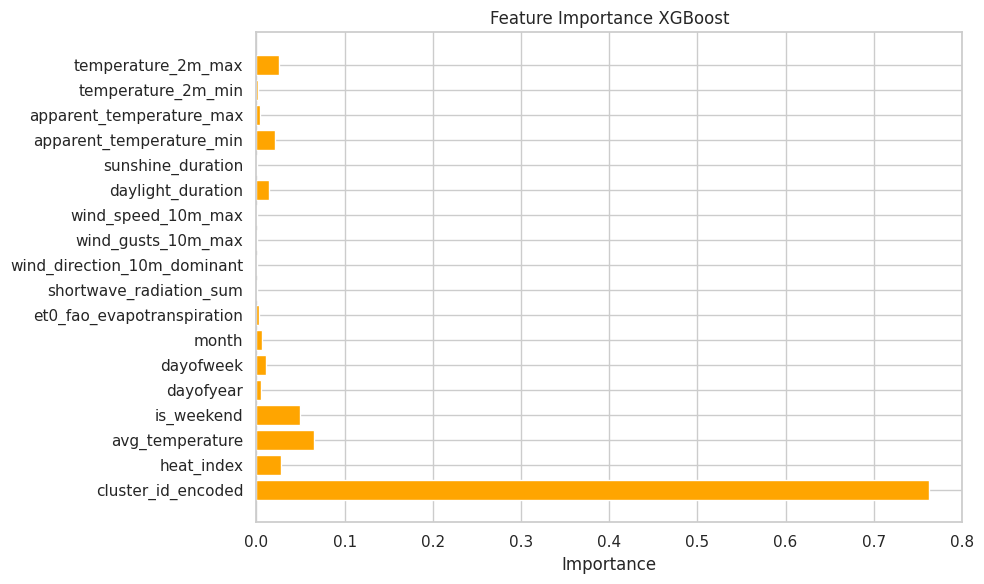

In [ ]:
importances = final_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances, color='orange')
plt.xlabel("Importance")
plt.title("Feature Importance XGBoost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

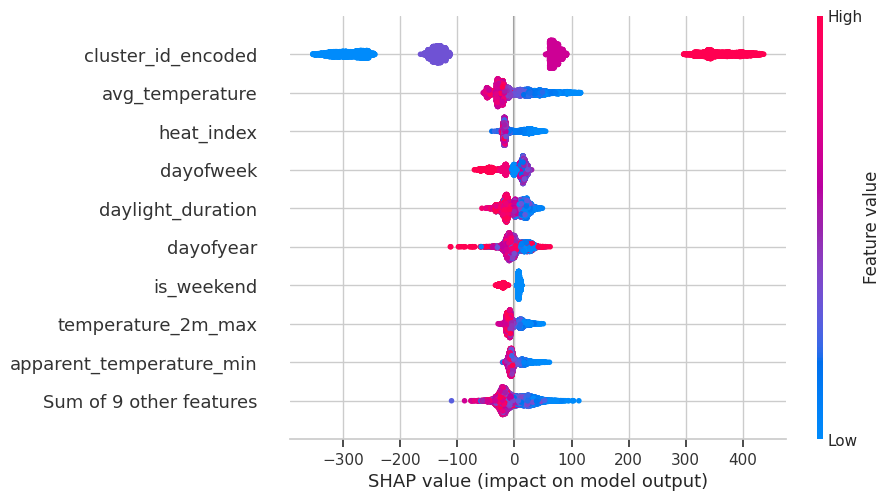

In [ ]:
import shap

# SHAP explainer (untuk tree model seperti XGBoost)
explainer = shap.Explainer(final_model)
shap_values = explainer(X_train)

# Ringkasan global semua fitur
shap.plots.beeswarm(shap_values)